In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\JOY\Downloads\ToyotaCorolla.csv")
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [3]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [4]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [5]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

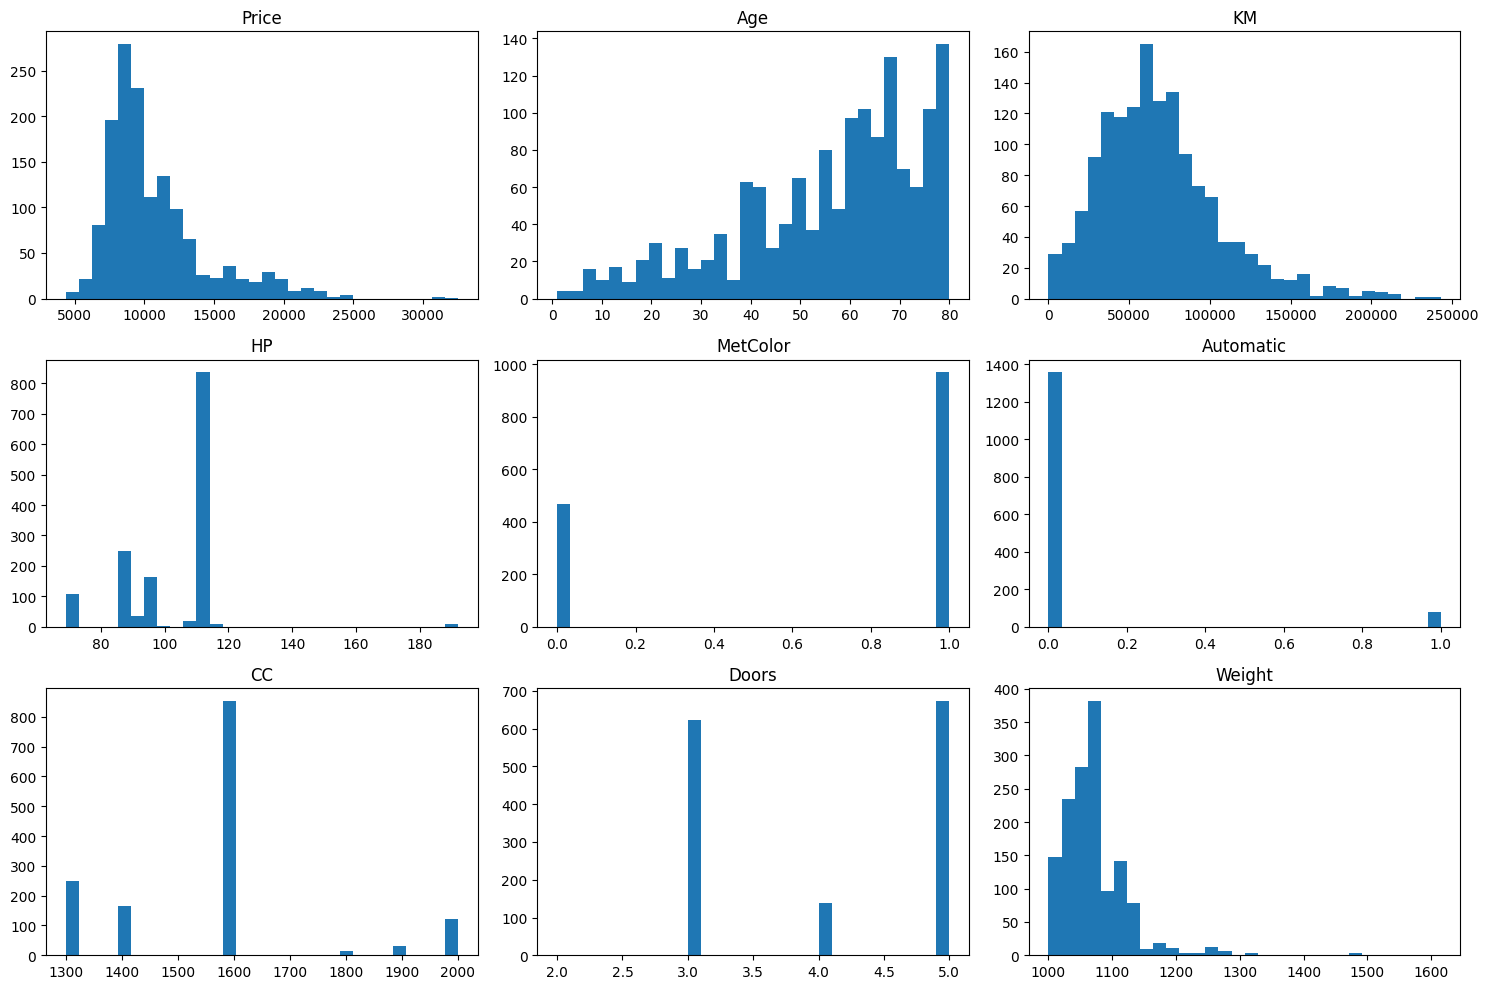

In [6]:
 

columns = ['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']
num_columns = len(columns) 

nrows = (num_columns + 2) // 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].hist(df[column].dropna(), bins=30)  # Drop NA values for plotting
    axes[i].set_title(column) 
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

    




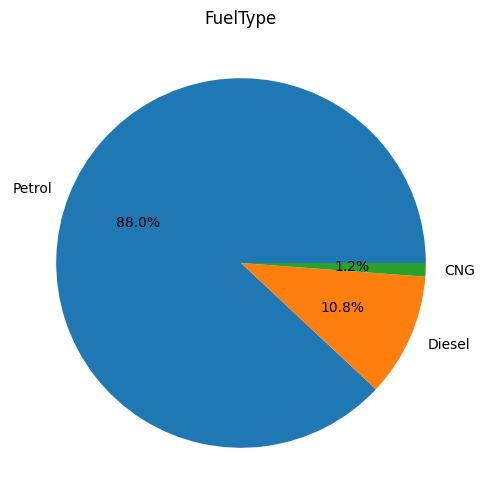

In [8]:

fuel_type_counts = df['FuelType'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(fuel_type_counts, labels = fuel_type_counts.index, autopct='%1.1f%%')
plt.title('FuelType')
plt.show()

In [9]:
df.nunique() 

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform="pandas")
cat_encoded = encoder.fit_transform(df[['FuelType']])
cat_encoded


,FuelType_Diesel,FuelType_Petrol
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1431,0.0,1.0
1432,0.0,1.0
1433,0.0,1.0
1434,0.0,1.0


In [11]:
df1 = pd.concat([df,cat_encoded],axis=1)
df1.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,1.0,0.0
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,1.0,0.0
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,1.0,0.0
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,1.0,0.0
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,1.0,0.0


In [12]:
df1.drop(['FuelType'], axis=1, inplace=True)

                    Price       Age        KM        HP  MetColor  Automatic  \
Price            1.000000 -0.876590 -0.569960  0.314990  0.108905   0.033081   
Age             -0.876590  1.000000  0.505672 -0.156622 -0.108150   0.031717   
KM              -0.569960  0.505672  1.000000 -0.333538 -0.080503  -0.081854   
HP               0.314990 -0.156622 -0.333538  1.000000  0.058712   0.013144   
MetColor         0.108905 -0.108150 -0.080503  0.058712  1.000000  -0.019335   
Automatic        0.033081  0.031717 -0.081854  0.013144 -0.019335   1.000000   
CC               0.165067 -0.133182  0.302150  0.050884  0.034921  -0.069321   
Doors            0.185326 -0.148359 -0.036197  0.092424  0.085243  -0.027654   
Weight           0.581198 -0.470253 -0.028598  0.089614  0.057929   0.057249   
FuelType_Diesel  0.054084 -0.097740  0.403060 -0.533453 -0.012420  -0.084490   
FuelType_Petrol -0.038516  0.092611 -0.433160  0.489110  0.004872   0.080249   

                       CC     Doors    

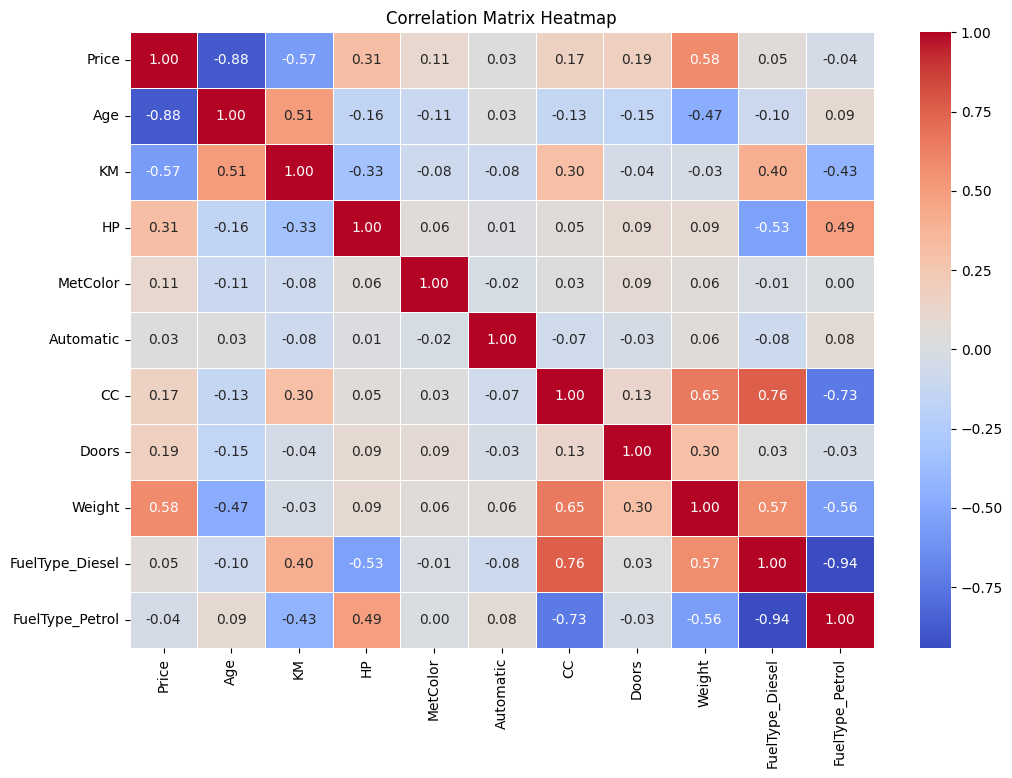

In [34]:
 
correlation_matrix = df1[['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']].corr()
 
print(correlation_matrix) 

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [13]:
df1.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
x=df1[['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_Diesel', 'FuelType_Petrol']]
y=df1[['Price']]
x.shape 

(1436, 10)

In [15]:
x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

In [17]:
svm = SVR()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
lr= LinearRegression()

In [18]:
svm.fit(x_train, y_train)


SVR()

In [19]:
rf.fit(x_train, y_train)


RandomForestRegressor()

In [20]:
dt.fit(x_train, y_train)


DecisionTreeRegressor()

In [21]:
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
svm_predictions = svm.predict(x_test)
svm_predictions

array([9867.21742222, 9855.97423   , 9816.01469288, ..., 9889.71344415,
       9823.62034277, 9805.57062366])

In [23]:

rf_predictions = rf.predict(x_test)

rf_predictions

array([ 9601.2 ,  9328.  ,  9241.8 , ..., 16057.  ,  8731.45, 15952.5 ])

In [24]:
dt_predictions = dt.predict(x_test)
dt_predictions

array([ 8950.,  9000.,  8950., ..., 15950.,  8750., 12950.])

In [25]:

lr_predictions = lr.predict(x_test)
lr_predictions 

array([[ 9233.41693758],
       [ 9823.29112836],
       [ 9347.67033202],
       ...,
       [15657.76505455],
       [ 7900.35595123],
       [15635.08095143]])

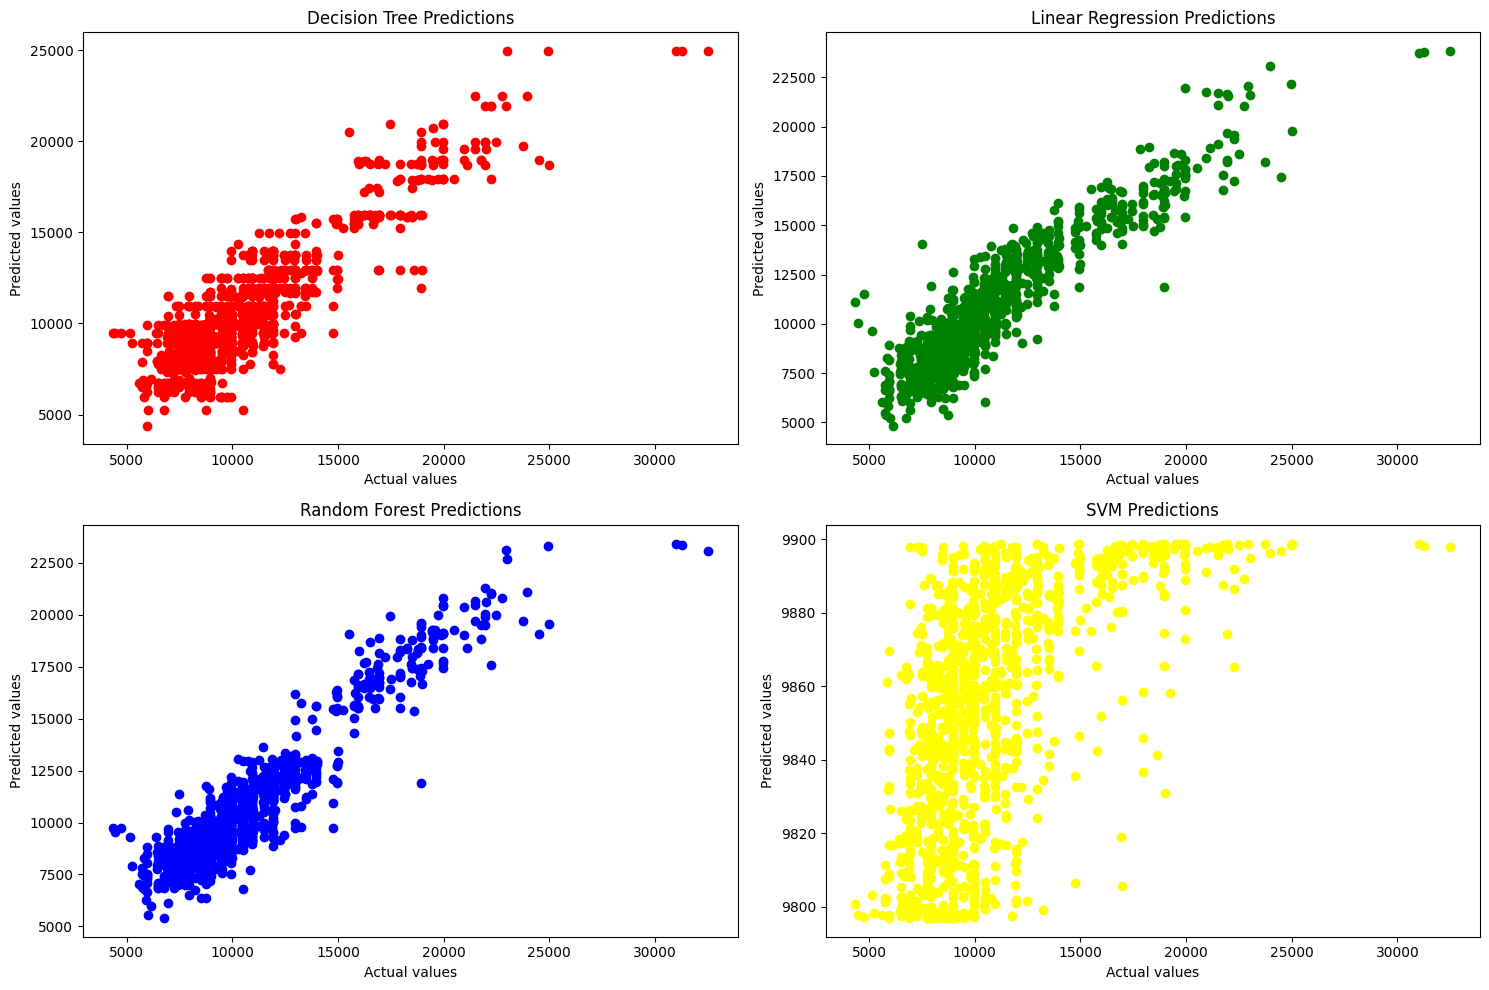

In [26]:
 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Decision Tree predictions
axs[0, 0].scatter(y_test, dt_predictions, color='red')
axs[0, 0].set_title('Decision Tree Predictions')
axs[0, 0].set_xlabel('Actual values')
axs[0, 0].set_ylabel('Predicted values')

# Linear Regression predictions
axs[0, 1].scatter(y_test, lr_predictions, color='green')
axs[0, 1].set_title('Linear Regression Predictions')
axs[0, 1].set_xlabel('Actual values')
axs[0, 1].set_ylabel('Predicted values')

# Random Forest predictions
axs[1, 0].scatter(y_test, rf_predictions, color='blue')
axs[1, 0].set_title('Random Forest Predictions')
axs[1, 0].set_xlabel('Actual values')
axs[1, 0].set_ylabel('Predicted values')

# SVM predictions
axs[1, 1].scatter(y_test, svm_predictions, color='yellow')
axs[1, 1].set_title('SVM Predictions')
axs[1, 1].set_xlabel('Actual values')
axs[1, 1].set_ylabel('Predicted values')

# Display the plots
plt.tight_layout()
plt.show()



In [27]:
print("SVM RMSE:", metrics.mean_squared_error(y_test, svm_predictions, squared=False))


SVM RMSE: 3753.8240069371495


In [28]:
print("Random Forest RMSE:", metrics.mean_squared_error(y_test, rf_predictions, squared=False))


Random Forest RMSE: 1266.9954324165392


In [29]:
print("Decision Tree RMSE:", metrics.mean_squared_error(y_test, dt_predictions, squared=False))

Decision Tree RMSE: 1610.0079966040294


In [30]:
print("Linear Regression RMSE:", metrics.mean_squared_error(y_test, lr_predictions, squared=False))

Linear Regression RMSE: 1422.6439130179815
